# fixed_point_iteration_method
Find a root in an interval using fixed point iteration method

$$\tag{1}
f(x) = \sin(x - 0.26\pi) - 0.41
$$

$$
\begin{array}{rcl}\tag{2}
0 & = & \sin(x - 0.26\pi) - 0.41 \newline
& = & 2\sin(\tfrac12 x - 0.13\pi) \cos(\tfrac12 x - 0.13\pi) - 0.41 \newline
0.41 & = & 2 \sin(\tfrac12 x - 0.13\pi) \cos(\tfrac12 x - 0.13\pi) \newline
\frac{\displaystyle 0.205}{\displaystyle \cos(\tfrac12 x - 0.13\pi)} & = & \sin(\tfrac12 x - 0.13\pi) \newline
\sin(\tfrac12 x - 0.13\pi) & = & \frac{\displaystyle 0.205}{\displaystyle \cos(\tfrac12 x - 0.13\pi)} \newline
\tfrac12 x - 0.13\pi & = & \sin^{-1} \left[ \frac{\displaystyle 0.205}{\displaystyle \cos(\tfrac12 x - 0.13\pi)} \right] \newline
\tfrac12 x & = & \sin^{-1} \left[ \frac{\displaystyle 0.205}{\displaystyle \cos(\tfrac12 x - 0.13\pi)} \right] + 0.13\pi \newline
x & = & 2 \sin^{-1} \left[ \frac{\displaystyle 0.205}{\displaystyle \cos(\tfrac12 x - 0.13\pi)} \right] + 0.26\pi
\end{array}
$$

$$\tag{3}
x_{n + 1} = 2 \sin^{-1} \left[ \frac{\displaystyle 0.205}{\displaystyle \cos(\tfrac12 x_n - 0.13\pi)} \right] + 0.26\pi = g(x_n).
$$

In [3]:
import math

def f(x):
    y = math.sin(x - 0.26 * math.pi) - 0.41
    return y

x = [i * 0.03  for i in range(0, 100 + 1)]
y = [f(i) for i in x]

def g(x):
    a = 0.13 * math.pi
    b = math.cos(0.5 * x - a)
    c = 0.205
    d = 2 * math.asin(c / b) + 2 * a
    return d

In [4]:
xroot = []
yroot = []

x0 = 1
y0 = f(x0)
xroot.append(x0)
yroot.append(y0)

i = 1
eps = 1E-6
dx = 10
print("iter root         f(root)")
while dx > eps and i < 20:
    x0 = xroot[i-2]
    x1 = xroot[i-1]
    if i == 1:
        print(f"{i-1:04d}", f"{x1:.6E}", f"{f(x1):+.6E}")
    
    x1 = g(x0)
    
    xroot.append(x1)
    dx = abs(f(x1))
    
    print(f"{i:04d}", f"{x1:.6E}", f"{f(x1):+.6E}")
    i += 1

iter root         f(root)
0000 1.000000E+00 -2.278369E-01
0001 1.231505E+00 -7.092989E-03
0002 1.231505E+00 -7.092989E-03
0003 1.238915E+00 -3.223651E-04
0004 1.238915E+00 -3.223651E-04
0005 1.239252E+00 -1.481400E-05
0006 1.239252E+00 -1.481400E-05
0007 1.239267E+00 -6.811063E-07


In [5]:
print("root =", xroot[-1])
print("f(root) =", f(xroot[-1]))

root = 1.2392674053631287
f(root) = -6.811063382738958e-07


In [6]:
yroot = [f(i) for i in xroot]

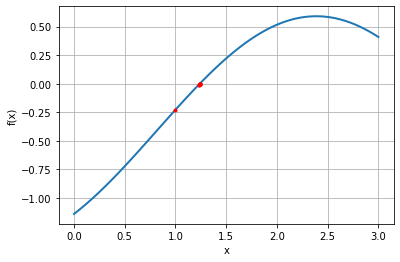

In [7]:
import matplotlib.pyplot as plt
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y, '-', xroot, yroot, 'r.', lw=2)
plt.show()

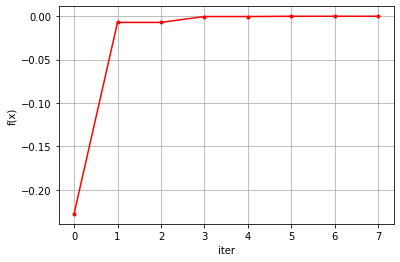

In [8]:
plt.grid()
plt.xlabel("iter")
plt.ylabel("f(x)")
plt.plot(yroot, 'r.-')
plt.show()

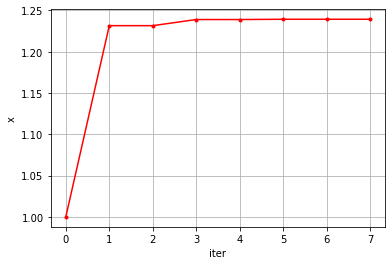

In [9]:
plt.grid()
plt.xlabel("iter")
plt.ylabel("x")
plt.plot(xroot, 'r.-')
plt.show()